Enter Number of vertices in a Polygon:  4


Start entering Points:
Enter Coordinates of Vertex 1 :


 1 1


Enter Coordinates of Vertex 2 :


 3 5


Enter Coordinates of Vertex 3 :


 7 7


Enter Coordinates of Vertex 4 :


 5 3


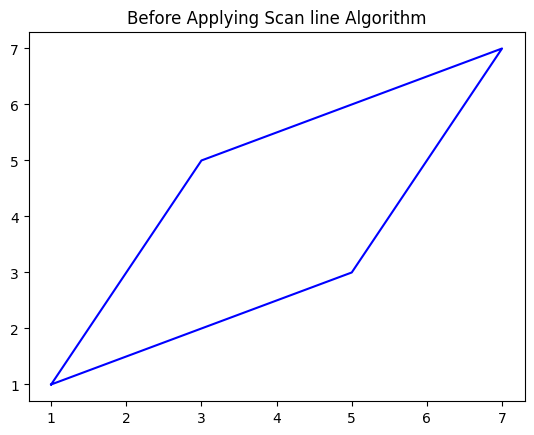

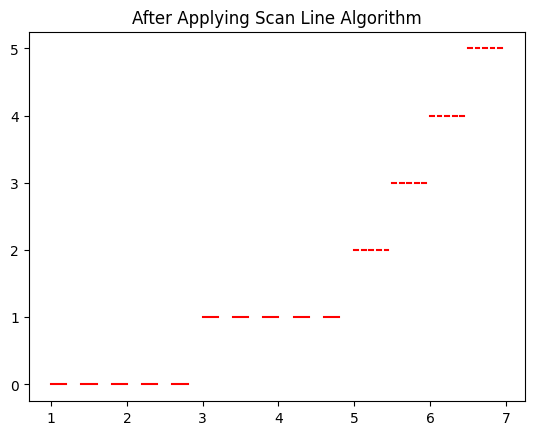

In [1]:
import matplotlib.pyplot as plt

def draw_graph(V):
    x = []
    y = []
    for i in V:
        x.append(i[0])
        y.append(i[1])
    plt.title("Before Applying Scan line Algorithm")
    plt.plot(x, y, c="blue", label="Polygon")
    plt.show()
    return int(max(y)), int(min(y)), int(max(x)), int(min(x))

def calpoints(x1, y1, x2, y2, xlist, ylist):
    m = (y2 - y1) / (x2 - x1)
    c = y1 - (m * x1)
    for i in range(abs(y2 - y1) * 10):
        if x1 <= x2:
            y = (i / 10) + y1
            x = (y - c) / m
            xlist.append(x)
            ylist.append(y)
        else:
            y = y1 - (i / 10)
            x = (y - c) / m
            xlist.append(x)
            ylist.append(y)
    return xlist, ylist

def get_range(V):
    y2, y1, x2, x1 = draw_graph(V)
    x = []
    y = []
    for i in range(len(V) - 1):
        x1 = V[i][0]
        y1 = V[i][1]
        x2 = V[i + 1][0]
        y2 = V[i + 1][1]
        x3, y3 = calpoints(x1, y1, x2, y2, x, y)
        x = x3
        y = y3
    fill_polygon(x, y)

def fill_polygon(x, y):
    edges = sorted(list(zip(x, y)), key=lambda p: p[1])
    min_y = int(min(edges, key=lambda p: p[1])[1])
    max_y = int(max(edges, key=lambda p: p[1])[1])
    scanlines = [[] for _ in range(min_y, max_y + 1)]
    for i in range(len(edges) - 1):
        x1, y1 = edges[i]
        x2, y2 = edges[i + 1]
        dx = abs(x2 - x1)
        dy = y2 - y1
        if dy != 0:
            slope = dx / dy
            if y1 < y2:
                y = y1
                while y < y2:
                    scanlines[int(y - min_y)].append(x1)
                    x1 += slope
                    y += 1
            else:
                y = y2
                while y < y1:
                    scanlines[int(y - min_y)].append(x2)
                    x2 += slope
                    y += 1
    fill_scanlines(scanlines)

def fill_scanlines(scanlines):
    for i in range(len(scanlines)):
        if len(scanlines[i]) >= 2:
            scanlines[i].sort()
            for j in range(0, len(scanlines[i]), 2):
                plt.plot([scanlines[i][j], scanlines[i][j + 1]], [i, i], c="red")
    plt.title("After Applying Scan Line Algorithm")
    plt.show()

count = int(input("Enter Number of vertices in a Polygon: "))
V = []
print("Start entering Points:")
for i in range(count):
    print("Enter Coordinates of Vertex", i + 1, ":")
    x, y = map(int, input().split())
    V.append([x, y])

V.append(V[0])  # Closing the polygon by adding the first vertex again
get_range(V)
